# 

**Analyzing Forest Data Among Countries & Regions: % of land area**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive

In [2]:
# dataframe for forest data
df = pd.read_csv('/content/API_AG.LND.FRST.ZS_DS2_en_csv_v2_13350.csv', skiprows=4)
df

266 rows × 69 columns

In [3]:
# drop unneeded columns
df = df.drop(columns=['Indicator Name', 'Indicator Code'])
df.head()

5 rows × 67 columns

In [4]:
# long format dataframe
df_long = df.melt(id_vars=['Country Name', 'Country Code'],
                 var_name='Year',
                 value_name='Forest Area (% of land area)')

df_long.head()

In [5]:
# drop na values and turn into numeric
df_long['Forest Area (% of land area)'] = pd.to_numeric(df_long['Forest Area (% of land area)'], errors='coerce')
df_long = df_long.dropna(subset=['Forest Area (% of land area)'])
df_long.head()

In [6]:
df_long['Year'] = df_long['Year'].astype(int)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_long['Year'] = df_long['Year'].astype(int)

In [7]:
# import country forest Metadata
meta_df = pd.read_csv('/content/Metadata_Country_API_AG.LND.FRST.ZS_DS2_en_csv_v2_13350.csv')
meta_df.head()

In [8]:
# merge df_long and meta_df based on country code to add incomegroup and region
merged_df = pd.merge(df_long, meta_df, on='Country Code')
merged_df = merged_df.drop(columns=['SpecialNotes', 'TableName','Unnamed: 5'])
merged_df

8409 rows × 6 columns

In [9]:
# check for NaN values
# turns out values in country name that had NAN for Region and IncomeGroup were wrongly placed because they are regions in country name column
# so drop all NaN values to keep only countries in Country Name
merged_df.loc[merged_df.isna().any(axis=1)]

1597 rows × 6 columns

In [10]:
# drop NaN values in Region and IncomeGroup to keep only countries
merged_df = merged_df.dropna(subset=['Region', 'IncomeGroup'])

In [11]:
# use assert statement to check dataframe

# check Nan values
assert merged_df.isna().sum().sum() == 0, "NaN values still exist"

# check duplicates
assert merged_df.duplicated().sum() == 0, "Duplicates still exist"

print("NaN count:", merged_df.isna().sum().sum())
print("Duplicate count:", merged_df.duplicated().sum())

NaN count: 0
Duplicate count: 0

In [12]:
# completed and cleaned dataframe
merged_df

6812 rows × 6 columns

In [13]:
# Summary statistics of Global Forest Area per year

# Average forest area seems to be declining overtime
# Lowest forest area is 0

year_sumstats = merged_df.groupby('Year').agg({'Forest Area (% of land area)': ['mean', 'median', 'min', 'max']})
display(year_sumstats)
print('Year with highest mean forest area: ', year_sumstats['Forest Area (% of land area)']['mean'].idxmax())
print('Year with lowest mean forest area: ', year_sumstats['Forest Area (% of land area)']['mean'].idxmin())

Year with highest mean forest area:  1991
Year with lowest mean forest area:  2021

In [14]:
# Summary statistics of forest area by country OVERALL

country_sumstats = merged_df.groupby('Country Name').agg({'Forest Area (% of land area)': ['mean', 'median', 'min', 'max']})
display(country_sumstats)
print('Country with highest mean forest area: ', country_sumstats['Forest Area (% of land area)']['mean'].idxmax())
print('Country with lowest mean forest area: ', country_sumstats['Forest Area (% of land area)']['mean'].idxmin())

213 rows × 4 columns

Country with highest mean forest area:  Suriname
Country with lowest mean forest area:  Gibraltar

In [15]:
# Years that had the highest/lowest forest area for each country

highest_years = merged_df.loc[
    merged_df.groupby('Country Name')['Forest Area (% of land area)'].idxmax()
][['Country Name', 'Year', 'Forest Area (% of land area)']]
print('Years with Highest Forest Area for Each Country: ')
display(highest_years)


lowest_years = merged_df.loc[
    merged_df.groupby('Country Name')['Forest Area (% of land area)'].idxmin()
][['Country Name', 'Year', 'Forest Area (% of land area)']]
print('Years with Lowest Forest Area for Each Country: ')
display(lowest_years)

Years with Highest Forest Area for Each Country: 

213 rows × 3 columns

Years with Lowest Forest Area for Each Country: 

213 rows × 3 columns

In [16]:
# 1. Global average forest area per year
global_avg_per_year = merged_df.groupby("Year")["Forest Area (% of land area)"].mean().reset_index()
print("Global Average Forest Area Over Time (in % of land area):")
print(global_avg_per_year.head())

# 2. Top 10 countries with highest forest % in 2022
top_10_2022 = merged_df[merged_df["Year"] == 2022].sort_values(
    by="Forest Area (% of land area)", ascending=False
)[["Country Name", "Forest Area (% of land area)"]].head(10)
print("\nTop 10 Countries by Forest Area (% of land area) in 2022:")
print(top_10_2022)

# 3. Bottom 10 countries with lowest forest % in 2022
bottom_10_2022 = merged_df[merged_df["Year"] == 2022].sort_values(
    by="Forest Area (% of land area)", ascending=True
)[["Country Name", "Forest Area (% of land area)"]].head(10)
print("\nBottom 10 Countries by Forest Area (% of land area) in 2022:")
print(bottom_10_2022)

# 4. Average forest area by Region in 2022
region_avg_2022 = merged_df[merged_df["Year"] == 2022].groupby("Region")["Forest Area (% of land area)"].mean().reset_index()
print("\nAverage Forest Area by Region (2022):")
print(region_avg_2022)

# 5. Average forest area by Income Group in 2022
income_avg_2022 = merged_df[merged_df["Year"] == 2022].groupby("IncomeGroup")["Forest Area (% of land area)"].mean().reset_index()
print("\nAverage Forest Area by Income Group (2022):")
print(income_avg_2022)

Global Average Forest Area Over Time (in % of land area):
   Year  Forest Area (% of land area)
0  1990                     33.200781
1  1991                     34.062772
2  1992                     33.318033
3  1993                     33.129544
4  1994                     33.130938

Top 10 Countries by Forest Area (% of land area) in 2022:
               Country Name  Forest Area (% of land area)
8364               Suriname                     94.523874
8243                 Guyana                     93.456597
8229  Micronesia, Fed. Sts.                     92.114286
8230                  Gabon                     91.228471
8333                  Palau                     90.369565
8353        Solomon Islands                     90.086102
8237      Equatorial Guinea                     86.691622
8162         American Samoa                     85.350000
8334       Papua New Guinea                     79.028176
8277                Liberia                     78.456395

Bottom 10 Countr

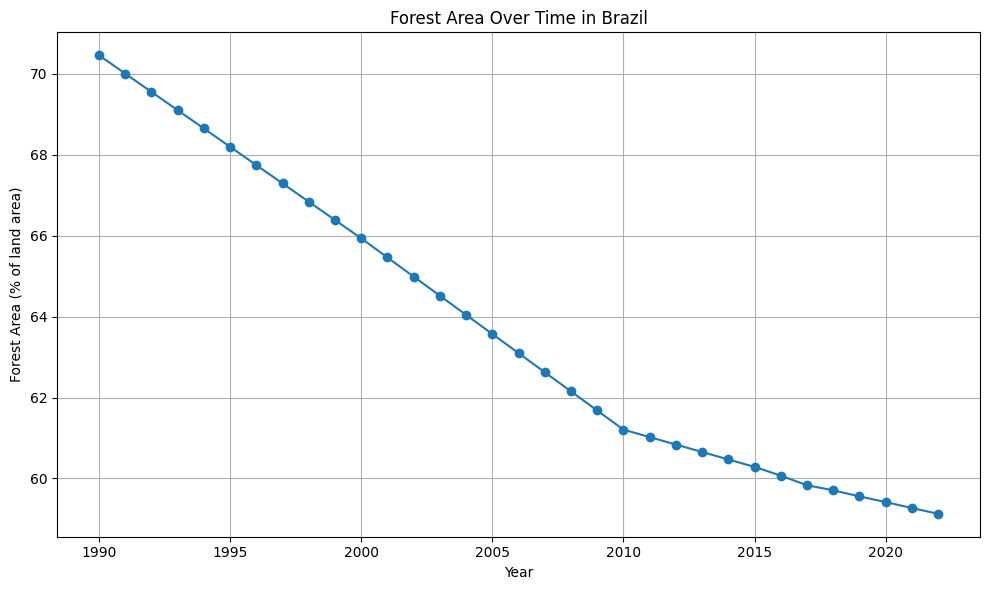

In [17]:
# Plot of Forest Area over time in Brazil
import matplotlib.pyplot as plt
import seaborn as sns

country = 'Brazil'  # change this to any country you want
country_data = merged_df[merged_df['Country Name'] == country]

plt.figure(figsize=(10, 6))
plt.plot(country_data['Year'], country_data['Forest Area (% of land area)'], marker='o')
plt.title(f'Forest Area Over Time in {country}')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land area)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
sns.set(style="whitegrid")

#1. Global avg forest area over time LINE PLOT
plt.figure(figsize=(10,6))
sns.lineplot(data=global_avg_per_year, x='Year', y='Forest Area (% of land area)', marker="o")
plt.title('Global Average Forest Area over time')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land area)')
plt.tight_layout()
plt.show()

In [19]:
#2. Top 10 Countries by Forest Area in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10,6))
sns.barplot(data=top_10_2022.sort_values("Forest Area (% of land area)"),
            y="Country Name", x="Forest Area (% of land area)",
            hue="Country Name", palette="Greens", legend=False)
plt.title("Top 10 countries by Forest Area ( % of land area) in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Country Name")
plt.tight_layout()
plt.show()

In [20]:
#3. Bottom 10 Countries by Forest Area in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_2022, y="Country Name", x="Forest Area (% of land area)",
            hue="Country Name", palette="Reds", legend=False)
plt.title("Bottom 10 Countries by Forest Area (% of Land Area) in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [21]:
#4. Average Forest Area by Region in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(10, 6))
sns.barplot(data=region_avg_2022.sort_values("Forest Area (% of land area)"),
            y="Region", x="Forest Area (% of land area)", hue="Region",
            palette="Blues_d", legend=False)
plt.title("Average Forest Area by Region in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

In [22]:
# 5. Average Forest Area by Income Group in 2022 (Horizontal Bar Plot)

plt.figure(figsize=(8, 5))
sns.barplot(data=income_avg_2022.sort_values("Forest Area (% of land area)"),
            y="IncomeGroup", x="Forest Area (% of land area)", hue="IncomeGroup",
            palette="Purples", legend=False)
plt.title("Average Forest Area by Income Group in 2022")
plt.xlabel("Forest Area (% of land area)")
plt.ylabel("Income Group")
plt.tight_layout()
plt.show()

In [23]:
# Performance of prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = merged_df.copy()
df = pd.get_dummies(df, columns=['Region', 'IncomeGroup'], drop_first=True)

x = df.drop(columns=['Country Name', 'Country Code', 'Forest Area (% of land area)'])   # x is year, region, incomegroup
y = df['Forest Area (% of land area)']       # outcome

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lmod = LinearRegression().fit(x_train, y_train)

y_pred = lmod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

# High MSE, so the linear model was not the best to predict forest area
# R^2 = 0.26 means that only 25% of variance in Y (forest area), is explained in the independent vars

MSE:  455.3446307661934
R^2:  0.25952407318859005

In [24]:
# try with different x
df1 = merged_df.copy()
df2 = pd.get_dummies(df1, columns=['Region', 'IncomeGroup', 'Country Name', 'Country Code'], drop_first=True)

x2 = df2.drop(columns=['Forest Area (% of land area)'])   # x is name, code, year, region, incomegroup
y2 = df2['Forest Area (% of land area)']       # outcome

x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

lmod = LinearRegression().fit(x_train, y_train)

y_pred = lmod.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: ", mse)
print("R^2: ", r2)

# This model is better, using different set of independent variables (x), with a lower MSE and higher R^2

MSE:  4.279687224962895
R^2:  0.9930404244384413

In [25]:
# Interactive Map: Forest Area in 2022

import plotly.express as px
import plotly.io as pio
import sys

# Automatically set renderer depending on environment (Colab or Jupyter)
if 'google.colab' in sys.modules:
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "notebook"

# Filter data for 2022
map_data_2022 = merged_df[merged_df["Year"] == 2022].copy()

# Create Choropleth Map
fig = px.choropleth(
    map_data_2022,
    locations="Country Code",                    # ISO 3-letter country codes
    color="Forest Area (% of land area)",         # Color by forest %
    hover_name="Country Name",                    # Full country name on hover
    color_continuous_scale="Greens",               # Color scale (green shades)
    projection="natural earth",                   # Natural Earth projection
    title="Global Forest Area (% of Land Area) - 2022",
)

# Map Layout Adjustments
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    fitbounds="locations"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0}
)

# Show the figure
fig.show()


In [26]:
#Animated map showing forest area year-by-year (1990–2022)!

import plotly.io as pio
import sys

# To Check if running in Colab
'''if 'google.colab' in sys.modules:
    pio.renderers.default = "colab"
else:
    pio.renderers.default = "notebook"
'''
fig = px.choropleth(
    merged_df,
    locations="Country Code",
    color="Forest Area (% of land area)",
    hover_name="Country Name",
    animation_frame="Year",
    color_continuous_scale="YlGn",
    range_color=(0, 100),
    projection="natural earth",
    title="Forest Area (% of Land Area) Over Time (1990–2022)"
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

fig.show()

fig.write_html("animated_by_year.html")
